<a href="https://colab.research.google.com/github/KonstantinData/courses_certificates_journals/blob/main/Car_Dataset_Analysis_Project_Konstantin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Car Dataset Analysis Project**

The goal is to **clean, transform, and analyze** the data by performing the tasks below.





# **Getting started**

In [413]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns





In [414]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/car_data.csv'
df_car_raw = pd.read_csv(file_path)




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**This is the data provided as raw data**

- I named this df_car_raw

> **Take a first look at the data**



In [365]:
df_car_raw.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [366]:
df_car_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

**In the first step I create a copy of the raw data**

In [367]:
df_car = df_car_raw.copy()
df_car

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


# **Data Cleaning**

### Data Cleaning Overview  

- To ensure data quality and consistency, several cleaning steps were applied:  

### Handling Missing Data  
- Identified and addressed missing values by either filling them appropriately or removing rows.  

### Data Type Conversion  
- Ensured that columns have the correct data types for analysis (e.g., converting `Year` to an integer or float).  

### Filtering Data  
- Included only cars from the year 1995 and later.  

### String Standardization  
- Converted text entries in `Vehicle Style` and `Market Category` to lowercase for consistency.  

These steps improve data reliability and facilitate accurate analysis.  


## **Handle Missing Data**

I analyzed the missing values in each column and found that some columns have no missing data, while others have only a few missing values that can be filled or removed. Columns with more missing values may need mean, median, or mode imputation, while columns with a lot of missing data might have to be removed or replaced with a standard value, depending on their importance for the analysis.

In [368]:
missing_values = df_car.isna().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64


### Deciding how to handle missing data for each column with NaN values

#### **Engine HP**

Please expand the view to see the edits made to the Engine HP column.

In [369]:
print(df_car[df_car['Engine HP'].isna()])

         Make        Model  Year                Engine Fuel Type  Engine HP  \
539      FIAT         500e  2015                        electric        NaN   
540      FIAT         500e  2016                        electric        NaN   
541      FIAT         500e  2017                        electric        NaN   
2905  Lincoln  Continental  2017  premium unleaded (recommended)        NaN   
2906  Lincoln  Continental  2017  premium unleaded (recommended)        NaN   
...       ...          ...   ...                             ...        ...   
9850      Kia      Soul EV  2015                        electric        NaN   
9851      Kia      Soul EV  2015                        electric        NaN   
9852      Kia      Soul EV  2016                        electric        NaN   
9853      Kia      Soul EV  2016                        electric        NaN   
9854      Kia      Soul EV  2016                        electric        NaN   

      Engine Cylinders Transmission Type      Drive

In [370]:
pd.set_option('display.max_rows', None)
print(df_car[(df_car["Engine HP"].isna())].head(70))

               Make        Model  Year                  Engine Fuel Type  \
539            FIAT         500e  2015                          electric   
540            FIAT         500e  2016                          electric   
541            FIAT         500e  2017                          electric   
2905        Lincoln  Continental  2017    premium unleaded (recommended)   
2906        Lincoln  Continental  2017    premium unleaded (recommended)   
2907        Lincoln  Continental  2017    premium unleaded (recommended)   
2908        Lincoln  Continental  2017    premium unleaded (recommended)   
4203           Ford       Escape  2017                  regular unleaded   
4204           Ford       Escape  2017                  regular unleaded   
4205           Ford       Escape  2017                  regular unleaded   
4206           Ford       Escape  2017                  regular unleaded   
4705          Honda       Fit EV  2013                          electric   
4706        

**I was able to determine the missing Engine HP values ​​via internet research with Chat Gpt. In addition, I randomly checked values ​​for accuracy using a Google search. I imported the data as a new CSV file**

In [371]:
from google.colab import drive
drive.mount('/content/drive')
file_path = ("/content/drive/MyDrive/updated_engine_hp.csv")
updated_engine_hp = pd.read_csv(file_path)
print(updated_engine_hp)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
    Index           Make        Model  Year  Engine HP  Engine Cylinders
0     539           FIAT         500e  2015        111                 0
1     540           FIAT         500e  2016        111                 0
2     541           FIAT         500e  2017        111                 0
3    2905        Lincoln  Continental  2017        305                 6
4    2906        Lincoln  Continental  2017        305                 6
5    2907        Lincoln  Continental  2017        305                 6
6    2908        Lincoln  Continental  2017        305                 6
7    4203           Ford       Escape  2017        168                 4
8    4204           Ford       Escape  2017        168                 4
9    4205           Ford       Escape  2017        168                 4
10   4206           Ford       Escape  2017        168              

**To update missing "Engine HP" values in `df_car`, I first set `"Index"` as the index in `updated_engine_hp` using `set_index("Index", inplace=True)`, ensuring the row numbers match `df_car`. Then, I used `df_car.update(updated_engine_hp[["Engine HP"]])` to replace only the missing values while keeping the existing structure unchanged.**

**I ran print(df_car[df_car["Engine HP"].isna()]) to see if all positions were empty.**

In [372]:
updated_engine_hp.set_index("Index", inplace=True)

df_car.update(updated_engine_hp[["Engine HP"]])

print(df_car[df_car["Engine HP"].isna()])

Empty DataFrame
Columns: [Make, Model, Year, Engine Fuel Type, Engine HP, Engine Cylinders, Transmission Type, Driven_Wheels, Number of Doors, Market Category, Vehicle Size, Vehicle Style, highway MPG, city mpg, Popularity, MSRP]
Index: []


In [373]:
pd.reset_option('display.max_rows')
from IPython.display import display
display(df_car)




,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


#### **Engine Fuel Type**
Please expand the view to see the edits made to the Engine Fuel Type column.

In [374]:
print(df_car[df_car['Engine Fuel Type'].isna()])

         Make   Model  Year Engine Fuel Type  Engine HP  Engine Cylinders  \
11321  Suzuki  Verona  2004              NaN      155.0               6.0   
11322  Suzuki  Verona  2004              NaN      155.0               6.0   
11323  Suzuki  Verona  2004              NaN      155.0               6.0   

      Transmission Type      Driven_Wheels  Number of Doors Market Category  \
11321         AUTOMATIC  front wheel drive              4.0             NaN   
11322         AUTOMATIC  front wheel drive              4.0             NaN   
11323         AUTOMATIC  front wheel drive              4.0             NaN   

      Vehicle Size Vehicle Style  highway MPG  city mpg  Popularity   MSRP  
11321      Midsize         Sedan           25        17         481  17199  
11322      Midsize         Sedan           25        17         481  20199  
11323      Midsize         Sedan           25        17         481  18499  


**Based on the data for Brand, Model, Year, Engine HP, and Cylinder, it can be assumed that the three NaN positions also have the same fuel type.**

In [375]:
print(df_car[(df_car["Make"] == "Suzuki") & (df_car["Model"] == "Verona")])

         Make   Model  Year  Engine Fuel Type  Engine HP  Engine Cylinders  \
11321  Suzuki  Verona  2004               NaN      155.0               6.0   
11322  Suzuki  Verona  2004               NaN      155.0               6.0   
11323  Suzuki  Verona  2004               NaN      155.0               6.0   
11324  Suzuki  Verona  2005  regular unleaded      155.0               6.0   
11325  Suzuki  Verona  2005  regular unleaded      155.0               6.0   
11326  Suzuki  Verona  2005  regular unleaded      155.0               6.0   
11327  Suzuki  Verona  2005  regular unleaded      155.0               6.0   
11328  Suzuki  Verona  2006  regular unleaded      155.0               6.0   
11329  Suzuki  Verona  2006  regular unleaded      155.0               6.0   

      Transmission Type      Driven_Wheels  Number of Doors Market Category  \
11321         AUTOMATIC  front wheel drive              4.0             NaN   
11322         AUTOMATIC  front wheel drive              4.0  

**The code searches for rows in df_car that match the specified criteria and updates their "Engine Fuel Type" to "regular unleaded." It then prints all rows where "Engine Fuel Type" is still NaN to verify whether the update was applied correctly.**

In [376]:
df_car.loc[
    (df_car["Make"] == "Suzuki") &
    (df_car["Model"] == "Verona") &
    (df_car["Year"] == 2004),
    "Engine Fuel Type"
] = "regular unleaded"

print(df_car[df_car['Engine Fuel Type'].isna()])




Empty DataFrame
Columns: [Make, Model, Year, Engine Fuel Type, Engine HP, Engine Cylinders, Transmission Type, Driven_Wheels, Number of Doors, Market Category, Vehicle Size, Vehicle Style, highway MPG, city mpg, Popularity, MSRP]
Index: []


### **Engine Cylinders**

Please expand the view to see the edits made to the Engine Cylinders column.

In [377]:
pd.set_option('display.max_rows', None)
print(df_car[df_car['Engine Cylinders'].isna()])


            Make    Model  Year             Engine Fuel Type  Engine HP  \
1983   Chevrolet  Bolt EV  2017                     electric      200.0   
1984   Chevrolet  Bolt EV  2017                     electric      200.0   
3716  Volkswagen   e-Golf  2015                     electric      115.0   
3717  Volkswagen   e-Golf  2015                     electric      115.0   
3718  Volkswagen   e-Golf  2016                     electric      115.0   
3719  Volkswagen   e-Golf  2016                     electric      115.0   
5778  Mitsubishi   i-MiEV  2014                     electric       66.0   
5779  Mitsubishi   i-MiEV  2016                     electric       66.0   
5780  Mitsubishi   i-MiEV  2017                     electric       66.0   
8373      Toyota  RAV4 EV  2012                     electric      154.0   
8695       Mazda     RX-7  1993             regular unleaded      255.0   
8696       Mazda     RX-7  1994             regular unleaded      255.0   
8697       Mazda     RX-7

**My research showed that the NaN values in `"Engine Cylinders"` correspond to either electric vehicles or cars with a Wankel engine, both of which have no cylinders.**

In [378]:
df_car['Engine Cylinders'] = df_car['Engine Cylinders'].fillna(0)


**Missing values (`NaN`) in the `"Engine Cylinders"` column were replaced with `0` using `df_car['Engine Cylinders'] = df_car['Engine Cylinders'].fillna(0)`, ensuring that vehicles with unknown or absent cylinder data are represented consistently instead of remaining as missing values.**


In [379]:
print(df_car[df_car['Engine Cylinders'].isna()])



Empty DataFrame
Columns: [Make, Model, Year, Engine Fuel Type, Engine HP, Engine Cylinders, Transmission Type, Driven_Wheels, Number of Doors, Market Category, Vehicle Size, Vehicle Style, highway MPG, city mpg, Popularity, MSRP]
Index: []


## **Further Cleaning**
This dataset was cleaned and structured by removing duplicates, standardizing labels, and splitting multiple values into separate columns. A new column was created to assign higher-level vehicle categories, and redundant label information was removed for consistency.



**- Drop Duplicates**

In [380]:
pd.reset_option('display.max_rows')

df_car.drop_duplicates()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


**- Clean labels from additional information**

In [381]:
df_car["Engine Fuel Type"] = df_car["Engine Fuel Type"].str.strip("(required)(recommended)")
df_car

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded,335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded,300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded,300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded,230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded,230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded,300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded,300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded,300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded,300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


**Split multiple labels in a column into new columns**

In [382]:
# First I define the Categories out of the data in the column "Market Category"
segment_categories = {"Luxury", "Exotic"}
body_type_categories = {"Hatchback", "Crossover"}
engine_type_categories = {'Flex Fuel', 'Hybrid', 'Diesel', 'Flex Fuel, Hybrid',
       'Flex Fuel, Diesel'}
performance_categories = {"High-Performance", "Performance", "Factory Tuner"}

# Function to categorize values correctly
def categorize_market_category(row):
    segments, body_types, engine_types, performances = [], [], [], []

    if pd.notna(row):  # Ensures the value is not NaN
        categories = row.split(",")  # Splits the values

        for category in categories:
            category = category.strip()  # Removes any extra spaces

            if category in segment_categories:
                segments.append(category)
            elif category in body_type_categories:
                body_types.append(category)
            elif category in engine_type_categories:
                engine_types.append(category)
            elif category in performance_categories:
                performances.append(category)

    return [
        ", ".join(segments) if segments else np.nan,
        ", ".join(body_types) if body_types else np.nan,
        ", ".join(engine_types) if engine_types else np.nan,
        ", ".join(performances) if performances else np.nan
    ]


# Apply function to categorize the data
df_car[["Segment", "Body Type", "Engine Type", "Performance Type"]] = df_car["Market Category"].apply(categorize_market_category).apply(pd.Series)
df_car.drop(columns=["Market Category"], inplace=True)
df_car


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Segment,Body Type,Engine Type,Performance Type
0,BMW,1 Series M,2011,premium unleaded,335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135,Luxury,NaN,NaN,"Factory Tuner, High-Performance"
1,BMW,1 Series,2011,premium unleaded,300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650,Luxury,NaN,NaN,Performance
2,BMW,1 Series,2011,premium unleaded,300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350,Luxury,NaN,NaN,High-Performance
3,BMW,1 Series,2011,premium unleaded,230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450,Luxury,NaN,NaN,Performance
4,BMW,1 Series,2011,premium unleaded,230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500,Luxury,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded,300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,46120,Luxury,"Crossover, Hatchback",NaN,NaN
11910,Acura,ZDX,2012,premium unleaded,300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,56670,Luxury,"Crossover, Hatchback",NaN,NaN
11911,Acura,ZDX,2012,premium unleaded,300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50620,Luxury,"Crossover, Hatchback",NaN,NaN
11912,Acura,ZDX,2013,premium unleaded,300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50920,Luxury,"Crossover, Hatchback",NaN,NaN


**- Create a new column and assign higher-level vehicle categories.**

In [383]:
df_car["Vehicle Style"].unique()

array(['Coupe', 'Convertible', 'Sedan', 'Wagon', '4dr Hatchback',
       '2dr Hatchback', '4dr SUV', 'Passenger Minivan', 'Cargo Minivan',
       'Crew Cab Pickup', 'Regular Cab Pickup', 'Extended Cab Pickup',
       '2dr SUV', 'Cargo Van', 'Convertible SUV', 'Passenger Van'],
      dtype=object)

In [390]:
car = {"Coupe", "Convertible", "Sedan", "Wagon", "4dr Hatchback", "2dr Hatchback"}
suv = {"4dr SUV", "2dr SUV", "Convertible SUV"}
truck = {"Crew Cab Pickup", "Regular Cab Pickup", "Extended Cab Pickup"}
minivan = {"Passenger Minivan", "Cargo Minivan"}
van = {"Cargo Van", "Passenger Van"}

def categorize_vehicle_style(row):
    categories_combined = []

    if pd.notna(row):
        categories = row.split(",")

        for category in categories:
            category = category.strip()

            if category in car:
                categories_combined.append("Car")
            elif category in suv:
                categories_combined.append("SUV")
            elif category in truck:
                categories_combined.append("Truck")
            elif category in minivan:
                categories_combined.append("Minivan")
            elif category in van:
                categories_combined.append("Van")


    return ", ".join(categories_combined) if categories_combined else np.nan

df_car["Body Type"] = df_car["Vehicle Style"].apply(categorize_vehicle_style)

df_car


,Make,Model,Year,Engine HP,Engine Cylinders,Engine Fuel Type,Transmission Type,Driven_Wheels,Vehicle Style,Number of Doors,Vehicle Size,Segment,Body Type,highway MPG,city mpg,Engine Type,Performance Type,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6.0,premium unleaded,MANUAL,rear wheel drive,Coupe,2.0,Compact,Luxury,Car,26,19,NaN,"Factory Tuner, High-Performance",3916,46135
1,BMW,1 Series,2011,300.0,6.0,premium unleaded,MANUAL,rear wheel drive,Convertible,2.0,Compact,Luxury,Car,28,19,NaN,Performance,3916,40650
2,BMW,1 Series,2011,300.0,6.0,premium unleaded,MANUAL,rear wheel drive,Coupe,2.0,Compact,Luxury,Car,28,20,NaN,High-Performance,3916,36350
3,BMW,1 Series,2011,230.0,6.0,premium unleaded,MANUAL,rear wheel drive,Coupe,2.0,Compact,Luxury,Car,28,18,NaN,Performance,3916,29450
4,BMW,1 Series,2011,230.0,6.0,premium unleaded,MANUAL,rear wheel drive,Convertible,2.0,Compact,Luxury,Car,28,18,NaN,NaN,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,premium unleaded,AUTOMATIC,all wheel drive,Hatchback,4.0,Midsize,Luxury,NaN,23,16,NaN,NaN,204,46120
11910,Acura,ZDX,2012,300.0,6.0,premium unleaded,AUTOMATIC,all wheel drive,Hatchback,4.0,Midsize,Luxury,NaN,23,16,NaN,NaN,204,56670
11911,Acura,ZDX,2012,300.0,6.0,premium unleaded,AUTOMATIC,all wheel drive,Hatchback,4.0,Midsize,Luxury,NaN,23,16,NaN,NaN,204,50620
11912,Acura,ZDX,2013,300.0,6.0,premium unleaded,AUTOMATIC,all wheel drive,Hatchback,4.0,Midsize,Luxury,NaN,23,16,NaN,NaN,204,50920


**- Clean labels from double information**

In [391]:
df_car["Vehicle Style"] = df_car["Vehicle Style"].str.strip("(2dr)(4dr)")


In [395]:
columns_ordered = [
    "Make", "Model", "Year",
    "Engine HP", "Engine Cylinders", "Engine Fuel Type", "Engine Type", "Performance Type",
    "Transmission Type", "Driven_Wheels",
    "Segment", "Body Type", "Vehicle Size", "Vehicle Style", "Number of Doors",
    "highway MPG", "city mpg",
    "Popularity", "MSRP"
]

df_car = df_car[columns_ordered]

df_car



,Make,Model,Year,Engine HP,Engine Cylinders,Engine Fuel Type,Engine Type,Performance Type,Transmission Type,Driven_Wheels,Segment,Body Type,Vehicle Size,Vehicle Style,Number of Doors,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6.0,premium unleaded,NaN,"Factory Tuner, High-Performance",MANUAL,rear wheel drive,Luxury,Car,Compact,Coupe,2.0,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,premium unleaded,NaN,Performance,MANUAL,rear wheel drive,Luxury,Car,Compact,Convertible,2.0,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,premium unleaded,NaN,High-Performance,MANUAL,rear wheel drive,Luxury,Car,Compact,Coupe,2.0,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,premium unleaded,NaN,Performance,MANUAL,rear wheel drive,Luxury,Car,Compact,Coupe,2.0,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,premium unleaded,NaN,NaN,MANUAL,rear wheel drive,Luxury,Car,Compact,Convertible,2.0,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,premium unleaded,NaN,NaN,AUTOMATIC,all wheel drive,Luxury,NaN,Midsize,Hatchback,4.0,23,16,204,46120
11910,Acura,ZDX,2012,300.0,6.0,premium unleaded,NaN,NaN,AUTOMATIC,all wheel drive,Luxury,NaN,Midsize,Hatchback,4.0,23,16,204,56670
11911,Acura,ZDX,2012,300.0,6.0,premium unleaded,NaN,NaN,AUTOMATIC,all wheel drive,Luxury,NaN,Midsize,Hatchback,4.0,23,16,204,50620
11912,Acura,ZDX,2013,300.0,6.0,premium unleaded,NaN,NaN,AUTOMATIC,all wheel drive,Luxury,NaN,Midsize,Hatchback,4.0,23,16,204,50920


In [417]:
df_car.rename(columns={"highway MPG": "Highway MPG"}, inplace=True)
df_car


,Make,Model,Year,Engine HP,Engine Cylinders,Engine Fuel Type,Engine Type,Performance Type,Transmission Type,Driven_Wheels,Segment,Body Type,Vehicle Size,Vehicle Style,Number of Doors,Highway MPG,City MPG,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6,premium unleaded,Unknown,"Factory Tuner, High-Performance",MANUAL,rear wheel drive,Luxury,Car,Compact,Coupe,2,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6,premium unleaded,Unknown,Performance,MANUAL,rear wheel drive,Luxury,Car,Compact,Convertible,2,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6,premium unleaded,Unknown,High-Performance,MANUAL,rear wheel drive,Luxury,Car,Compact,Coupe,2,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6,premium unleaded,Unknown,Performance,MANUAL,rear wheel drive,Luxury,Car,Compact,Coupe,2,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6,premium unleaded,Unknown,Unknown,MANUAL,rear wheel drive,Luxury,Car,Compact,Convertible,2,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6,premium unleaded,Unknown,Unknown,AUTOMATIC,all wheel drive,Luxury,Unknown,Midsize,Hatchback,4,23,16,204,46120
11910,Acura,ZDX,2012,300.0,6,premium unleaded,Unknown,Unknown,AUTOMATIC,all wheel drive,Luxury,Unknown,Midsize,Hatchback,4,23,16,204,56670
11911,Acura,ZDX,2012,300.0,6,premium unleaded,Unknown,Unknown,AUTOMATIC,all wheel drive,Luxury,Unknown,Midsize,Hatchback,4,23,16,204,50620
11912,Acura,ZDX,2013,300.0,6,premium unleaded,Unknown,Unknown,AUTOMATIC,all wheel drive,Luxury,Unknown,Midsize,Hatchback,4,23,16,204,50920


## **Data Type Conversion**

In [396]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine HP          11914 non-null  float64
 4   Engine Cylinders   11914 non-null  float64
 5   Engine Fuel Type   11914 non-null  object 
 6   Engine Type        1730 non-null   object 
 7   Performance Type   3503 non-null   object 
 8   Transmission Type  11914 non-null  object 
 9   Driven_Wheels      11914 non-null  object 
 10  Segment            3580 non-null   object 
 11  Body Type          8080 non-null   object 
 12  Vehicle Size       11914 non-null  object 
 13  Vehicle Style      11914 non-null  object 
 14  Number of Doors    11908 non-null  float64
 15  highway MPG        11914 non-null  int64  
 16  city mpg           119

In [397]:
# Convert "Engine Cylinders" to int after replacing NaN with 0
df_car["Engine Cylinders"] = df_car["Engine Cylinders"].fillna(0).astype(int)

# Convert "Number of Doors" to int after replacing NaN with 0
df_car["Number of Doors"] = df_car["Number of Doors"].fillna(0).astype(int)

# Replace NaN values in categorical columns with "Unknown"
df_car[["Engine Type", "Performance Type", "Segment", "Body Type"]] = df_car[["Engine Type", "Performance Type", "Segment", "Body Type"]].fillna("Unknown")

# Rename "city mpg" to "City MPG" for consistency
df_car.rename(columns={"city mpg": "City MPG"}, inplace=True)


In [398]:
df_car

,Make,Model,Year,Engine HP,Engine Cylinders,Engine Fuel Type,Engine Type,Performance Type,Transmission Type,Driven_Wheels,Segment,Body Type,Vehicle Size,Vehicle Style,Number of Doors,highway MPG,City MPG,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6,premium unleaded,Unknown,"Factory Tuner, High-Performance",MANUAL,rear wheel drive,Luxury,Car,Compact,Coupe,2,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6,premium unleaded,Unknown,Performance,MANUAL,rear wheel drive,Luxury,Car,Compact,Convertible,2,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6,premium unleaded,Unknown,High-Performance,MANUAL,rear wheel drive,Luxury,Car,Compact,Coupe,2,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6,premium unleaded,Unknown,Performance,MANUAL,rear wheel drive,Luxury,Car,Compact,Coupe,2,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6,premium unleaded,Unknown,Unknown,MANUAL,rear wheel drive,Luxury,Car,Compact,Convertible,2,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6,premium unleaded,Unknown,Unknown,AUTOMATIC,all wheel drive,Luxury,Unknown,Midsize,Hatchback,4,23,16,204,46120
11910,Acura,ZDX,2012,300.0,6,premium unleaded,Unknown,Unknown,AUTOMATIC,all wheel drive,Luxury,Unknown,Midsize,Hatchback,4,23,16,204,56670
11911,Acura,ZDX,2012,300.0,6,premium unleaded,Unknown,Unknown,AUTOMATIC,all wheel drive,Luxury,Unknown,Midsize,Hatchback,4,23,16,204,50620
11912,Acura,ZDX,2013,300.0,6,premium unleaded,Unknown,Unknown,AUTOMATIC,all wheel drive,Luxury,Unknown,Midsize,Hatchback,4,23,16,204,50920


✅ **"The cleaning is finished, so I am creating a new copy of the df_car DataFrame."**

In [418]:
df_car_clean = df_car.copy()
df_car_clean

,Make,Model,Year,Engine HP,Engine Cylinders,Engine Fuel Type,Engine Type,Performance Type,Transmission Type,Driven_Wheels,Segment,Body Type,Vehicle Size,Vehicle Style,Number of Doors,Highway MPG,City MPG,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6,premium unleaded,Unknown,"Factory Tuner, High-Performance",MANUAL,rear wheel drive,Luxury,Car,Compact,Coupe,2,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6,premium unleaded,Unknown,Performance,MANUAL,rear wheel drive,Luxury,Car,Compact,Convertible,2,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6,premium unleaded,Unknown,High-Performance,MANUAL,rear wheel drive,Luxury,Car,Compact,Coupe,2,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6,premium unleaded,Unknown,Performance,MANUAL,rear wheel drive,Luxury,Car,Compact,Coupe,2,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6,premium unleaded,Unknown,Unknown,MANUAL,rear wheel drive,Luxury,Car,Compact,Convertible,2,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6,premium unleaded,Unknown,Unknown,AUTOMATIC,all wheel drive,Luxury,Unknown,Midsize,Hatchback,4,23,16,204,46120
11910,Acura,ZDX,2012,300.0,6,premium unleaded,Unknown,Unknown,AUTOMATIC,all wheel drive,Luxury,Unknown,Midsize,Hatchback,4,23,16,204,56670
11911,Acura,ZDX,2012,300.0,6,premium unleaded,Unknown,Unknown,AUTOMATIC,all wheel drive,Luxury,Unknown,Midsize,Hatchback,4,23,16,204,50620
11912,Acura,ZDX,2013,300.0,6,premium unleaded,Unknown,Unknown,AUTOMATIC,all wheel drive,Luxury,Unknown,Midsize,Hatchback,4,23,16,204,50920


## **Filter Data**

In [402]:
df_car_from_1995 = df_car_clean[df_car_clean["Year"] >= 1995]
df_car_from_1995

,Make,Model,Year,Engine HP,Engine Cylinders,Engine Fuel Type,Engine Type,Performance Type,Transmission Type,Driven_Wheels,Segment,Body Type,Vehicle Size,Vehicle Style,Number of Doors,highway MPG,City MPG,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6,premium unleaded,Unknown,"Factory Tuner, High-Performance",MANUAL,rear wheel drive,Luxury,Car,Compact,Coupe,2,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6,premium unleaded,Unknown,Performance,MANUAL,rear wheel drive,Luxury,Car,Compact,Convertible,2,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6,premium unleaded,Unknown,High-Performance,MANUAL,rear wheel drive,Luxury,Car,Compact,Coupe,2,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6,premium unleaded,Unknown,Performance,MANUAL,rear wheel drive,Luxury,Car,Compact,Coupe,2,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6,premium unleaded,Unknown,Unknown,MANUAL,rear wheel drive,Luxury,Car,Compact,Convertible,2,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6,premium unleaded,Unknown,Unknown,AUTOMATIC,all wheel drive,Luxury,Unknown,Midsize,Hatchback,4,23,16,204,46120
11910,Acura,ZDX,2012,300.0,6,premium unleaded,Unknown,Unknown,AUTOMATIC,all wheel drive,Luxury,Unknown,Midsize,Hatchback,4,23,16,204,56670
11911,Acura,ZDX,2012,300.0,6,premium unleaded,Unknown,Unknown,AUTOMATIC,all wheel drive,Luxury,Unknown,Midsize,Hatchback,4,23,16,204,50620
11912,Acura,ZDX,2013,300.0,6,premium unleaded,Unknown,Unknown,AUTOMATIC,all wheel drive,Luxury,Unknown,Midsize,Hatchback,4,23,16,204,50920


## **String operations**
"Information: While cleaning the DataFrame, I split the 'Market Category' column into 'Segment,' 'Body Style,' 'Engine Type,' and 'Performance Type' and removed the 'Market Category' column."

In [412]:
df_car_clean[["Vehicle Style", "Segment"]] = df_car_clean[["Vehicle Style", "Segment"]].apply(lambda x: x.str.lower())
df_car_clean


,Make,Model,Year,Engine HP,Engine Cylinders,Engine Fuel Type,Engine Type,Performance Type,Transmission Type,Driven_Wheels,Segment,Body Type,Vehicle Size,Vehicle Style,Number of Doors,highway MPG,City MPG,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6,premium unleaded,Unknown,"Factory Tuner, High-Performance",MANUAL,rear wheel drive,luxury,Car,Compact,coupe,2,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6,premium unleaded,Unknown,Performance,MANUAL,rear wheel drive,luxury,Car,Compact,convertible,2,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6,premium unleaded,Unknown,High-Performance,MANUAL,rear wheel drive,luxury,Car,Compact,coupe,2,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6,premium unleaded,Unknown,Performance,MANUAL,rear wheel drive,luxury,Car,Compact,coupe,2,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6,premium unleaded,Unknown,Unknown,MANUAL,rear wheel drive,luxury,Car,Compact,convertible,2,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6,premium unleaded,Unknown,Unknown,AUTOMATIC,all wheel drive,luxury,Unknown,Midsize,hatchback,4,23,16,204,46120
11910,Acura,ZDX,2012,300.0,6,premium unleaded,Unknown,Unknown,AUTOMATIC,all wheel drive,luxury,Unknown,Midsize,hatchback,4,23,16,204,56670
11911,Acura,ZDX,2012,300.0,6,premium unleaded,Unknown,Unknown,AUTOMATIC,all wheel drive,luxury,Unknown,Midsize,hatchback,4,23,16,204,50620
11912,Acura,ZDX,2013,300.0,6,premium unleaded,Unknown,Unknown,AUTOMATIC,all wheel drive,luxury,Unknown,Midsize,hatchback,4,23,16,204,50920


# **Feature Engineering**

Creating New Columns

As part of the data enhancement process, new columns were added to provide additional insights:

Total MPG: Calculates the average of city MPG and highway MPG.
Price per HP: Determined by dividing MSRP by Engine HP.
These new features help improve analysis and data usability.

In [422]:
df_car_clean["Total MPG"] = df_car_clean[["City MPG", "Highway MPG"]].mean(axis=1)
df_car_clean

,Make,Model,Year,Engine HP,Engine Cylinders,Engine Fuel Type,Engine Type,Performance Type,Transmission Type,Driven_Wheels,Segment,Body Type,Vehicle Size,Vehicle Style,Number of Doors,Highway MPG,City MPG,Popularity,MSRP,Total MPG
0,BMW,1 Series M,2011,335.0,6,premium unleaded,Unknown,"Factory Tuner, High-Performance",MANUAL,rear wheel drive,Luxury,Car,Compact,Coupe,2,26,19,3916,46135,22.5
1,BMW,1 Series,2011,300.0,6,premium unleaded,Unknown,Performance,MANUAL,rear wheel drive,Luxury,Car,Compact,Convertible,2,28,19,3916,40650,23.5
2,BMW,1 Series,2011,300.0,6,premium unleaded,Unknown,High-Performance,MANUAL,rear wheel drive,Luxury,Car,Compact,Coupe,2,28,20,3916,36350,24.0
3,BMW,1 Series,2011,230.0,6,premium unleaded,Unknown,Performance,MANUAL,rear wheel drive,Luxury,Car,Compact,Coupe,2,28,18,3916,29450,23.0
4,BMW,1 Series,2011,230.0,6,premium unleaded,Unknown,Unknown,MANUAL,rear wheel drive,Luxury,Car,Compact,Convertible,2,28,18,3916,34500,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6,premium unleaded,Unknown,Unknown,AUTOMATIC,all wheel drive,Luxury,Unknown,Midsize,Hatchback,4,23,16,204,46120,19.5
11910,Acura,ZDX,2012,300.0,6,premium unleaded,Unknown,Unknown,AUTOMATIC,all wheel drive,Luxury,Unknown,Midsize,Hatchback,4,23,16,204,56670,19.5
11911,Acura,ZDX,2012,300.0,6,premium unleaded,Unknown,Unknown,AUTOMATIC,all wheel drive,Luxury,Unknown,Midsize,Hatchback,4,23,16,204,50620,19.5
11912,Acura,ZDX,2013,300.0,6,premium unleaded,Unknown,Unknown,AUTOMATIC,all wheel drive,Luxury,Unknown,Midsize,Hatchback,4,23,16,204,50920,19.5


In [424]:
df_car_clean["Price per HP"] = df_car_clean["MSRP"] / df_car_clean["Engine HP"]
df_car_clean


,Make,Model,Year,Engine HP,Engine Cylinders,Engine Fuel Type,Engine Type,Performance Type,Transmission Type,Driven_Wheels,...,Body Type,Vehicle Size,Vehicle Style,Number of Doors,Highway MPG,City MPG,Popularity,MSRP,Total MPG,Price per HP
0,BMW,1 Series M,2011,335.0,6,premium unleaded,Unknown,"Factory Tuner, High-Performance",MANUAL,rear wheel drive,...,Car,Compact,Coupe,2,26,19,3916,46135,22.5,137.716418
1,BMW,1 Series,2011,300.0,6,premium unleaded,Unknown,Performance,MANUAL,rear wheel drive,...,Car,Compact,Convertible,2,28,19,3916,40650,23.5,135.500000
2,BMW,1 Series,2011,300.0,6,premium unleaded,Unknown,High-Performance,MANUAL,rear wheel drive,...,Car,Compact,Coupe,2,28,20,3916,36350,24.0,121.166667
3,BMW,1 Series,2011,230.0,6,premium unleaded,Unknown,Performance,MANUAL,rear wheel drive,...,Car,Compact,Coupe,2,28,18,3916,29450,23.0,128.043478
4,BMW,1 Series,2011,230.0,6,premium unleaded,Unknown,Unknown,MANUAL,rear wheel drive,...,Car,Compact,Convertible,2,28,18,3916,34500,23.0,150.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6,premium unleaded,Unknown,Unknown,AUTOMATIC,all wheel drive,...,Unknown,Midsize,Hatchback,4,23,16,204,46120,19.5,153.733333
11910,Acura,ZDX,2012,300.0,6,premium unleaded,Unknown,Unknown,AUTOMATIC,all wheel drive,...,Unknown,Midsize,Hatchback,4,23,16,204,56670,19.5,188.900000
11911,Acura,ZDX,2012,300.0,6,premium unleaded,Unknown,Unknown,AUTOMATIC,all wheel drive,...,Unknown,Midsize,Hatchback,4,23,16,204,50620,19.5,168.733333
11912,Acura,ZDX,2013,300.0,6,premium unleaded,Unknown,Unknown,AUTOMATIC,all wheel drive,...,Unknown,Midsize,Hatchback,4,23,16,204,50920,19.5,169.733333


# Exploratory Data Analysis (EDA)

## Descriptive Statistics  
- Calculate summary statistics (mean, median, standard deviation) for the following columns:  
  - `Engine HP`  
  - `MSRP`  
  - `Popularity`  
  - `Highway MPG`  
  - `City MPG`  

## Group Analysis  
- Group data by the following columns and compute the average MSRP and Popularity for each group:  
  - `Driven_Wheels`  
  - `Vehicle Size`  
  - `Engine Cylinders`  

## Visualizations  
Generate the following plots to gain insights from the data:  
- **Histogram**: Distribution of the `City MPG` column.  
- **Bar Chart**: Average MSRP for each category in `Vehicle Size`.  
- **Scatter Plot**: Relationship between `Engine HP` and `MSRP`.  
- **Boxplot**: Distribution of `MSRP` for each category in `Driven_Wheels`.  
- **Line Plot**: Trends in average `City MPG` and `Highway MPG` for different `Transmission Type`.  

## Correlation Analysis  
- Investigate correlations between the following variables:  
  - `Engine HP`  
  - `MSRP`  
  - `Popularity`  
  - `City MPG`  
  - `Highway MPG`  


## **Descriptive Statistics:**

In [434]:
df_mean = df_car_clean[["Engine HP", "MSRP", "Popularity", "Highway MPG", "City MPG"]].mean()
print(f"Summary statistic (mean):\n{df_mean}")

Summary statistic (mean):
Engine HP        249.180964
MSRP           40594.737032
Popularity      1554.911197
Highway MPG       26.637485
City MPG          19.733255
dtype: float64


In [433]:
df_median = df_car_clean[["Engine HP", "MSRP", "Popularity", "Highway MPG", "City MPG"]].median()
print(f"Summary statistic (median):\n{df_median}")

Summary statistic (median):
Engine HP        227.0
MSRP           29995.0
Popularity      1385.0
Highway MPG       26.0
City MPG          18.0
dtype: float64


In [436]:
df_std = df_car_clean[["Engine HP", "MSRP", "Popularity", "Highway MPG", "City MPG"]].std()
print(f"Summary statistic (standard deviation):\n{df_std}")

Summary statistic (standard deviation):
Engine HP        109.179012
MSRP           60109.103604
Popularity      1441.855347
Highway MPG        8.863001
City MPG           8.987798
dtype: float64


## **Group Analysis:**

In [439]:
grouped_data = df_car_clean.groupby(["Driven_Wheels", "Vehicle Size", "Engine Cylinders"])[["MSRP", "Popularity"]].mean().reset_index()
grouped_data

,Driven_Wheels,Vehicle Size,Engine Cylinders,MSRP,Popularity
0,all wheel drive,Compact,4,30456.208861,1258.037975
1,all wheel drive,Compact,5,23431.818182,2292.272727
2,all wheel drive,Compact,6,67624.329897,1444.865979
3,all wheel drive,Compact,8,99476.923077,3497.615385
4,all wheel drive,Compact,10,205888.918919,2052.567568
...,...,...,...,...,...
56,rear wheel drive,Midsize,4,27187.500000,1827.947761
57,rear wheel drive,Midsize,5,2000.000000,617.000000
58,rear wheel drive,Midsize,6,31736.913127,1563.009653
59,rear wheel drive,Midsize,8,45412.653846,2200.098291


## **Visualizations:**

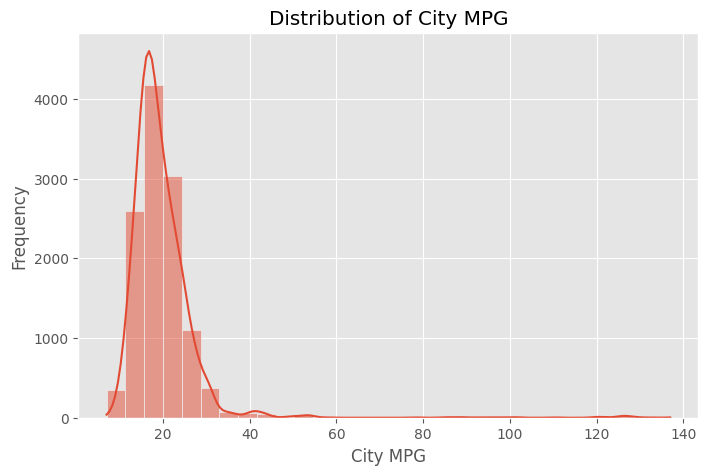

In [441]:
plt.style.use("ggplot")

# 1️⃣ Histogram for "City MPG"
plt.figure(figsize=(8, 5))
sns.histplot(df_car_clean["City MPG"], bins=30, kde=True)
plt.xlabel("City MPG")
plt.ylabel("Frequency")
plt.title("Distribution of City MPG")
plt.show()

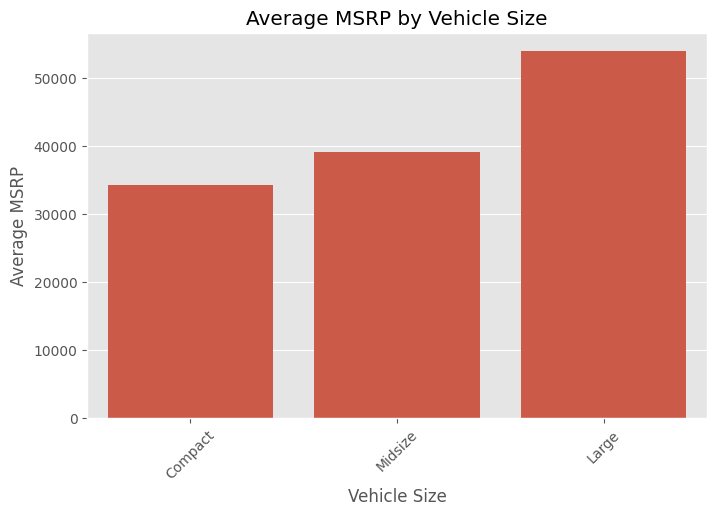

In [442]:
plt.figure(figsize=(8, 5))
avg_msrp = df_car_clean.groupby("Vehicle Size")["MSRP"].mean().sort_values()
sns.barplot(x=avg_msrp.index, y=avg_msrp.values)
plt.xlabel("Vehicle Size")
plt.ylabel("Average MSRP")
plt.title("Average MSRP by Vehicle Size")
plt.xticks(rotation=45)
plt.show()

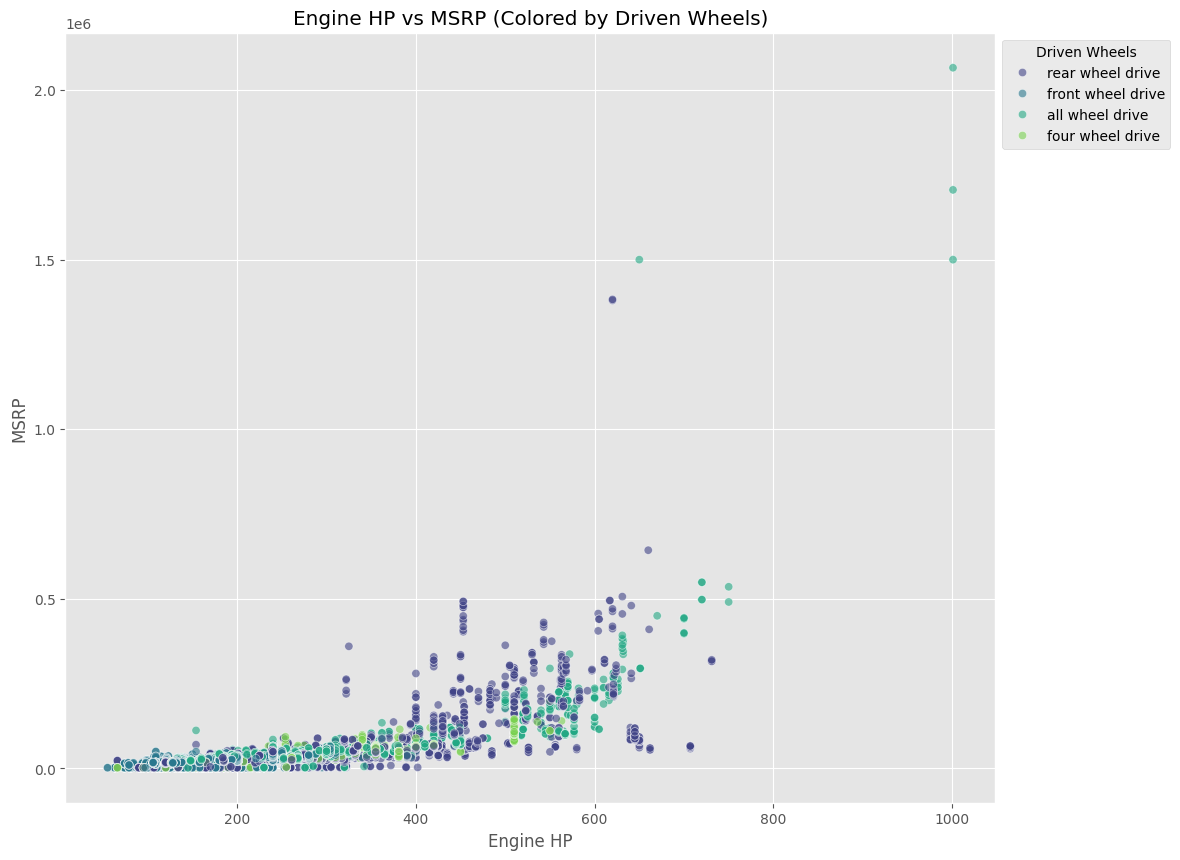

In [448]:
plt.figure(figsize=(12, 10))
sns.scatterplot(
    x=df_car_clean["Engine HP"],
    y=df_car_clean["MSRP"],
    hue=df_car_clean["Driven_Wheels"],
    alpha=0.6,
    palette="viridis"
)
plt.xlabel("Engine HP")
plt.ylabel("MSRP")
plt.title("Engine HP vs MSRP (Colored by Driven Wheels)")
plt.legend(title="Driven Wheels", bbox_to_anchor=(1, 1))
plt.show()


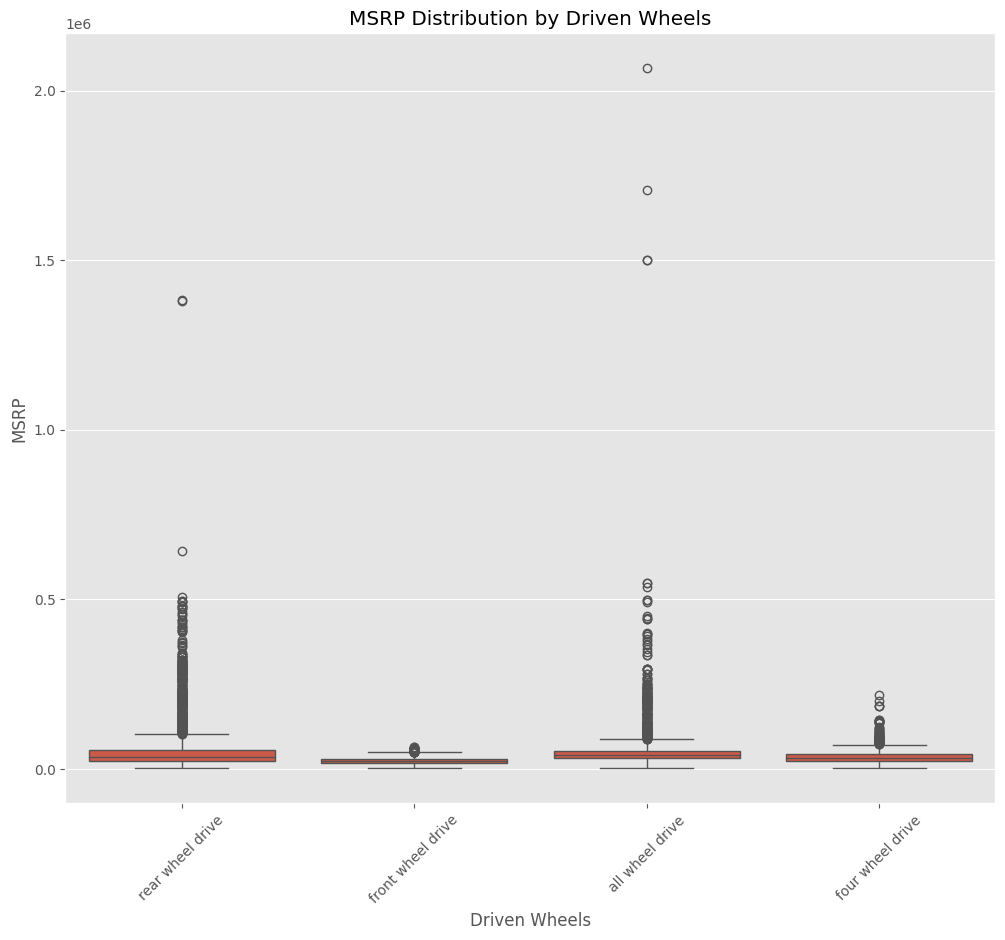

In [446]:
plt.figure(figsize=(12, 10))
sns.boxplot(x=df_car_clean["Driven_Wheels"], y=df_car_clean["MSRP"])
plt.xlabel("Driven Wheels")
plt.ylabel("MSRP")
plt.title("MSRP Distribution by Driven Wheels")
plt.xticks(rotation=45)
plt.show()

<Figure size 800x500 with 0 Axes>

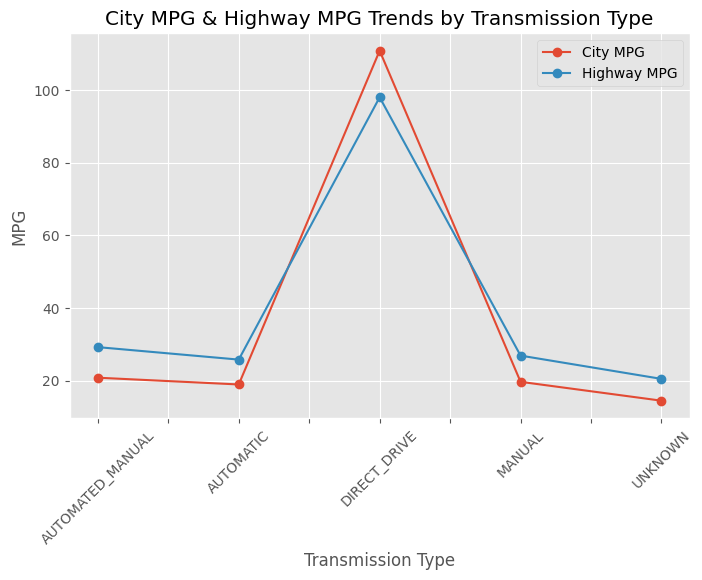

In [450]:
plt.figure(figsize=(8, 5))
avg_mpg = df_car_clean.groupby("Transmission Type")[["City MPG", "Highway MPG"]].mean()
avg_mpg.plot(kind="line", marker="o", figsize=(8, 5))
plt.xlabel("Transmission Type")
plt.ylabel("MPG")
plt.title("City MPG & Highway MPG Trends by Transmission Type")
plt.xticks(rotation=45)
plt.legend(["City MPG", "Highway MPG"])
plt.show()

## **Correlation Analysis:**

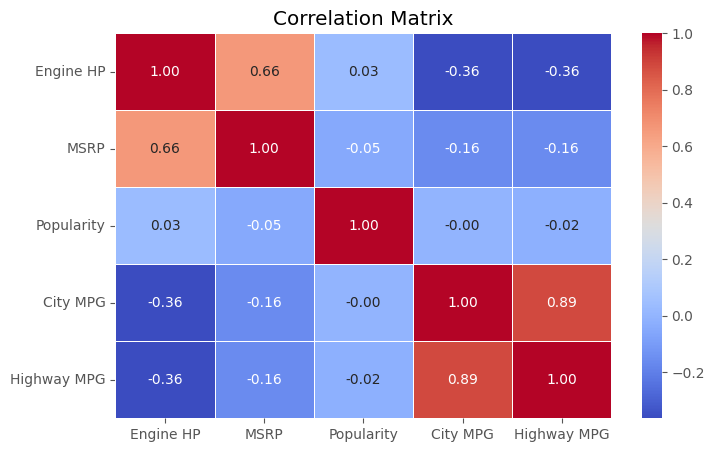

In [451]:
correlation_columns = ["Engine HP", "MSRP", "Popularity", "City MPG", "Highway MPG"]
correlation_matrix = df_car_clean[correlation_columns].corr()

plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


### **Interpretation of Key Relationships**  

#### **Engine HP & MSRP → Strong Positive Correlation**  
- A value close to **+1** means: The higher the engine power (`Engine HP`), the higher the price (`MSRP`).  
- **Logical explanation**: More powerful engines are typically found in more expensive vehicles.  

#### **Engine HP & Highway MPG / City MPG → Negative Correlation**  
- A value below **0** indicates: Cars with more horsepower consume more fuel and have lower MPG values.  
- **Logical explanation**: High-performance engines often have higher fuel consumption.  

#### **MSRP & Popularity → Weak or No Correlation**  
- A value close to **0** means: There is no direct relationship between vehicle price and popularity.  
- **Possible reason**: Expensive cars are not necessarily more popular—affordable and reliable vehicles may be in higher demand.  

#### **City MPG & Highway MPG → Very Strong Positive Correlation**  
- A value close to **+1** means: Cars that are fuel-efficient in the city also perform well on the highway.  
- **Logical explanation**: Fuel-efficient vehicles generally have low consumption in both conditions.  

## 📌 Conclusion  
✅ Cars with higher horsepower are more expensive but consume more fuel.  
✅ Fuel-efficient cars perform well both in city and highway driving.  
✅ The price of a vehicle does not directly influence its popularity.  


# **Project Summary: Car Dataset Analysis**

In this project, I worked with a car dataset to clean, transform, and analyze key variables related to vehicle performance, pricing, and popularity. The main goal was to identify patterns and relationships between different features.

### **<span style="color:blue">Key Findings</span>**

1. **<span style="color:blue">Correlation Analysis</span>**  
   - Cars with higher **Engine HP** tend to have a **higher price (MSRP)**. This makes sense because more powerful cars usually have better performance features, making them more expensive.  
   - A negative correlation exists between **Engine HP and fuel efficiency (MPG)**. More powerful engines consume more fuel, which results in lower **City MPG and Highway MPG**.  
   - The relationship between **MSRP and Popularity** is weak, meaning that a higher price does not necessarily make a car more popular. Other factors like brand reputation, reliability, and affordability likely play a bigger role.  
   - **City MPG and Highway MPG are strongly correlated**, which means that cars with good city mileage also tend to perform well on highways.

2. **<span style="color:blue">Descriptive Statistics</span>**  
   - The average **MSRP** varies significantly between different vehicle sizes and engine types.  
   - Some cars have extremely high prices, which could be due to luxury or high-performance models.  
   - The distribution of **City MPG** shows that most cars fall within a certain range, but there are some very fuel-efficient models as well.

3. **<span style="color:blue">Data Visualization Insights</span>**  
   - The **scatter plot** of **Engine HP vs. MSRP** clearly shows that cars with more horsepower are priced higher.  
   - The **boxplot** for **Driven Wheels vs. MSRP** shows that all-wheel-drive cars tend to have higher prices compared to front-wheel and rear-wheel-drive cars.  
   - The **bar chart** for **Vehicle Size vs. MSRP** reveals that larger vehicles, such as SUVs and trucks, are generally more expensive than smaller ones like sedans and hatchbacks.

### **<span style="color:blue">Conclusion</span>**  
Through this analysis, I learned how to clean and visualize data while identifying key relationships between features. The correlation between horsepower, fuel efficiency, and price was expected, but it was interesting to see that price alone does not determine a car’s popularity. This project helped me understand how data can be used to find meaningful
